In [2]:
import pandas as pd
import numpy as np
import json
import os.path as osp
import shutil

from Models.utils import ensure_path

with open("../imagenet_id_to_label.json", "r") as f:
    id2label = json.loads(f.read())

In [4]:
data_dir = "../datasets/miniimagenet/"
output_dir = "samples"

In [3]:

# copy 5 samples from each class
for set_n in ["train", "val", "test"]:
    set_df = pd.read_csv(osp.join(data_dir, "split", f"{set_n}.csv"))
    class_names = set_df["label"].unique()
    output_path = osp.join(output_dir, set_n)
    ensure_path(output_path)
    for c_name in class_names:
        paths = set_df.loc[set_df["label"] == c_name, "filename"]
        rand_sample_ints = np.random.choice(range(len(paths)), 5, replace=False)
        full_paths = [osp.join(data_dir, "images", path) for path in paths.values[rand_sample_ints]]
        for i, path in enumerate(full_paths):
            dest = osp.join(output_path, osp.basename(path))
            new_file_name = osp.join(output_path, f"{id2label[c_name].replace(' ', '_')}_{i}.jpg")
            shutil.copyfile(path, dest)
            shutil.move(dest, new_file_name)

In [6]:
df_list = []
for set_n in ["train", "val", "test"]:
    df_list.append(pd.read_csv(osp.join(data_dir, f"split/{set_n}.csv")))
all_data = pd.concat(df_list, axis=0)

In [7]:
all_data.head()

,filename,label
0,n0153282900000005.jpg,n01532829
1,n0153282900000006.jpg,n01532829
2,n0153282900000007.jpg,n01532829
3,n0153282900000010.jpg,n01532829
4,n0153282900000014.jpg,n01532829


In [8]:
from PIL import Image
file_paths = [osp.join(data_dir, "images", f_n) for f_n in all_data["filename"].values]
file_paths[:10]


['../datasets/miniimagenet/images/n0153282900000005.jpg',
 '../datasets/miniimagenet/images/n0153282900000006.jpg',
 '../datasets/miniimagenet/images/n0153282900000007.jpg',
 '../datasets/miniimagenet/images/n0153282900000010.jpg',
 '../datasets/miniimagenet/images/n0153282900000014.jpg',
 '../datasets/miniimagenet/images/n0153282900000015.jpg',
 '../datasets/miniimagenet/images/n0153282900000016.jpg',
 '../datasets/miniimagenet/images/n0153282900000017.jpg',
 '../datasets/miniimagenet/images/n0153282900000018.jpg',
 '../datasets/miniimagenet/images/n0153282900000019.jpg']

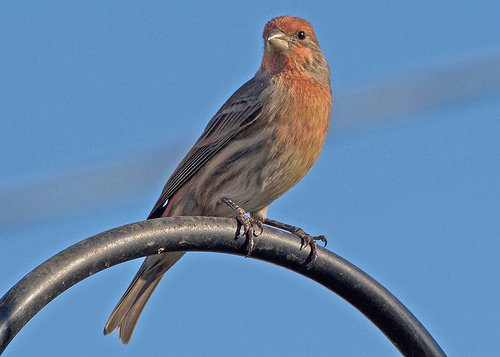

In [10]:
im = Image.open(file_paths[0]).convert("RGB")
im

In [11]:
type(im)

PIL.Image.Image

In [13]:
np.array(im).shape

(357, 500, 3)

In [15]:
import tqdm

im_shapes = []
for path in tqdm.tqdm(file_paths):
    im = np.array(Image.open(path).convert("RGB"))
    im_shapes.append(im.shape[:2])

100%|██████████| 60000/60000 [04:24<00:00, 227.12it/s]


In [17]:
im_shapes = np.array(im_shapes)

/var/folders/wp/sn8wc1l54lj8_lxzyjz6xh580000gn/T/ipykernel_63831/314374640.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


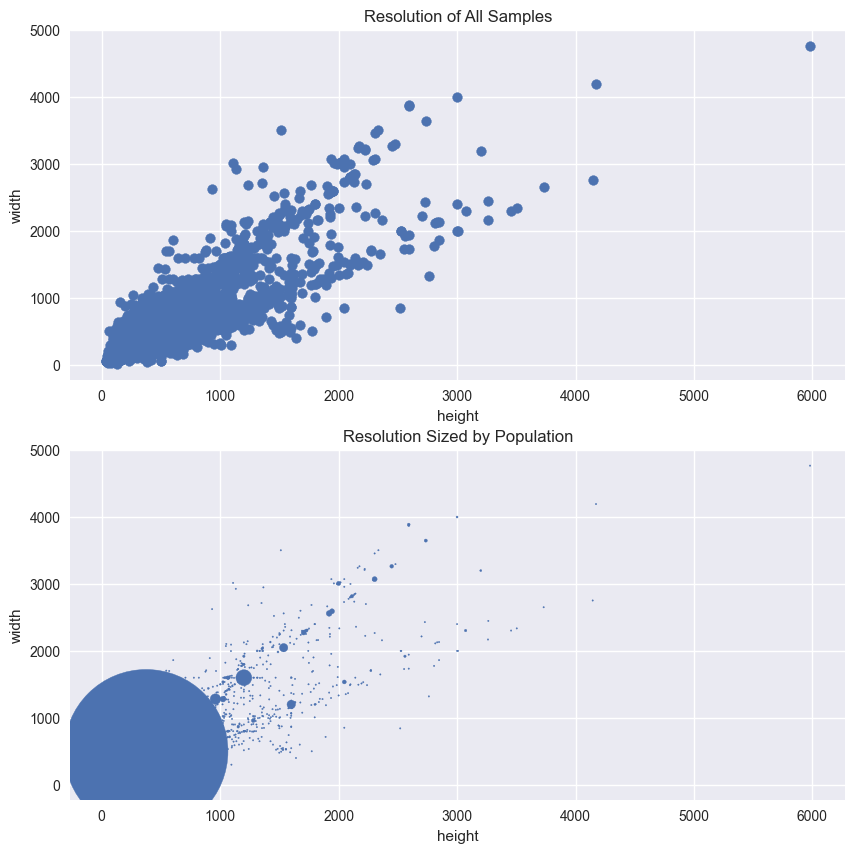

In [79]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

unq_shapes, counts = np.unique(im_shapes, axis=0, return_counts=True)

fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].grid(True)
ax[0].scatter(unq_shapes[:, 0], unq_shapes[:, 1])
ax[0].set_xlabel("height")
ax[0].set_ylabel("width")
ax[0].set_title("Resolution of All Samples")

ax[1].grid(True)
ax[1].scatter(unq_shapes[:, 0], unq_shapes[:, 1], s=counts)
ax[1].set_xlabel("height")
ax[1].set_ylabel("width")
ax[1].set_title("Resolution Sized by Population")
plt.show()

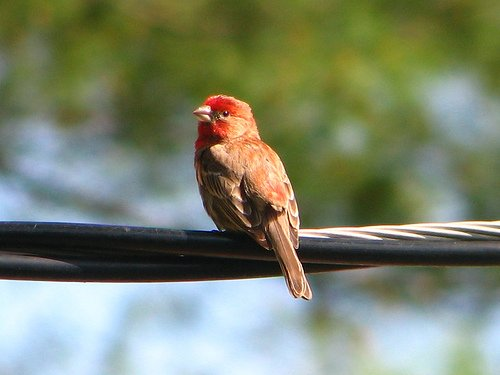

In [76]:
from PIL import Image
import torch
from torchvision import transforms

sample_im = Image.open(file_paths[100]).convert("RGB")
sample_im

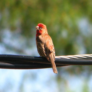

In [78]:
resized_im = transforms.Resize([92, 92])(sample_im)
resized_im

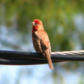

In [80]:
image_size = 84
centered_im = transforms.CenterCrop(image_size)(resized_im)
centered_im

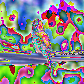

In [87]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(np.array([x / 255.0 for x in [125.3, 123.0, 113.9]]),
                             np.array([x / 255.0 for x in [63.0, 62.1, 66.7]])),
        transforms.ToPILImage()])
transformed_im = transform(centered_im).convert("RGB")
transformed_im

In [91]:
transforms.ToTensor()(sample_im).shape


torch.Size([3, 375, 500])

In [96]:
for set_n in ["train", "val", "test"]:
    set_df = pd.read_csv(osp.join(data_dir, f"split/{set_n}.csv"))
    class_names = set_df["label"].unique()
    print(set_n, [id2label[c] for c in class_names])
    print()

train ['house finch', 'robin', 'triceratops', 'green mamba', 'harvestman', 'toucan', 'jellyfish', 'dugong', 'Walker hound', 'Saluki', 'Gordon setter', 'komondor', 'boxer', 'Tibetan mastiff', 'French bulldog', 'Newfoundland', 'miniature poodle', 'Arctic fox', 'ladybug', 'three-toed sloth', 'rock beauty', 'aircraft carrier', 'ashcan', 'barrel', 'beer bottle', 'carousel', 'chime', 'clog', 'cocktail shaker', 'dishrag', 'dome', 'file', 'fire screen', 'frying pan', 'hair slide', 'holster', 'lipstick', 'oboe', 'organ', 'parallel bars', 'pencil box', 'photocopier', 'prayer rug', 'reel', 'slot', 'snorkel', 'solar dish', 'spider web', 'stage', 'tank', 'tile roof', 'tobacco shop', 'unicycle', 'upright', 'wok', 'worm fence', 'yawl', 'street sign', 'consomme', 'hotdog', 'orange', 'cliff', 'bolete', 'ear']

val ['goose', 'Ibizan hound', 'white wolf', 'meerkat', 'rhinoceros beetle', 'cannon', 'carton', 'catamaran', 'combination lock', 'garbage truck', 'horizontal bar', 'iPod', 'miniskirt', 'missile',